<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
# Display basic information about the dataset
print("Dataset dimensions:",boston_df.shape)
print("\nColumn names:", boston_df.columns)

Dataset dimensions: (506, 14)

Column names: Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [4]:
# Display the first few rows of the dataset to understand its structure
print("\nFirst few rows of the dataset:")
print(boston_df.head())


First few rows of the dataset:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [6]:
# Check for missing values
print("\nMissing values:")
print(boston_df.isnull().sum())


Missing values:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary statistics:")
print(boston_df.describe())


Summary statistics:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std   

<IPython.core.display.Javascript object>

C:\Users\PRASEETHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

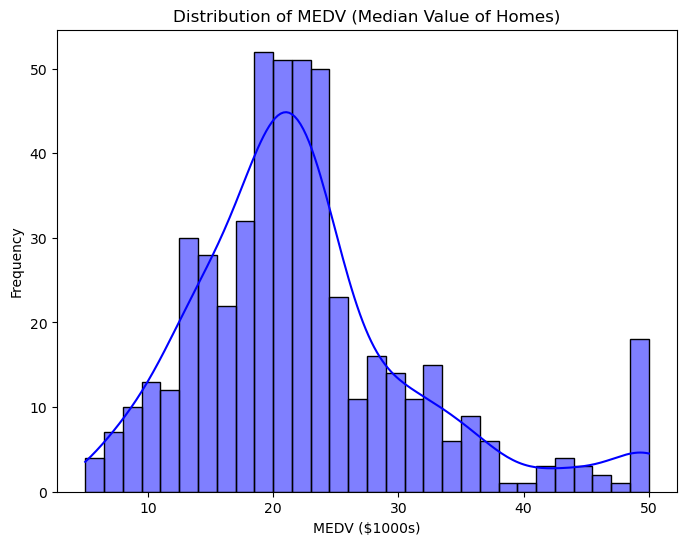

In [9]:
#  Histogram of MEDV (Median value of owner-occupied homes)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV ($1000s)')
plt.ylabel('Frequency')
plt.show()

<IPython.core.display.Javascript object>

C:\Users\PRASEETHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

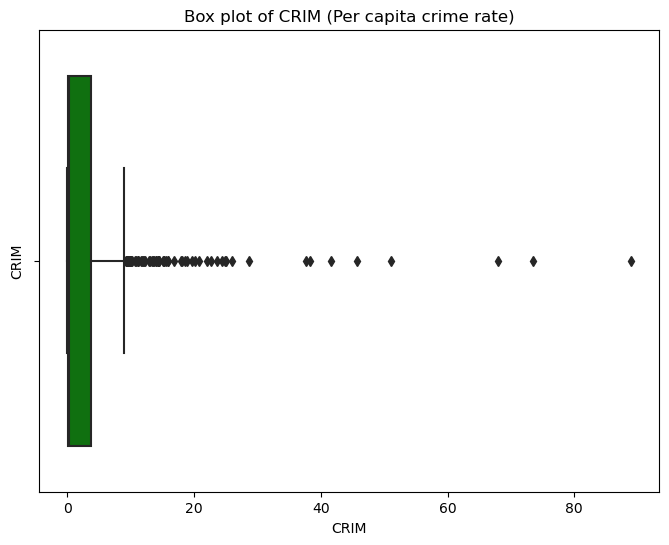

In [11]:
# Box plot of CRIM (Per capita crime rate)
plt.figure(figsize=(8, 6))
sns.boxplot(x='CRIM', data=boston_df, orient='v', color='green')
plt.title('Box plot of CRIM (Per capita crime rate)')
plt.ylabel('CRIM')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

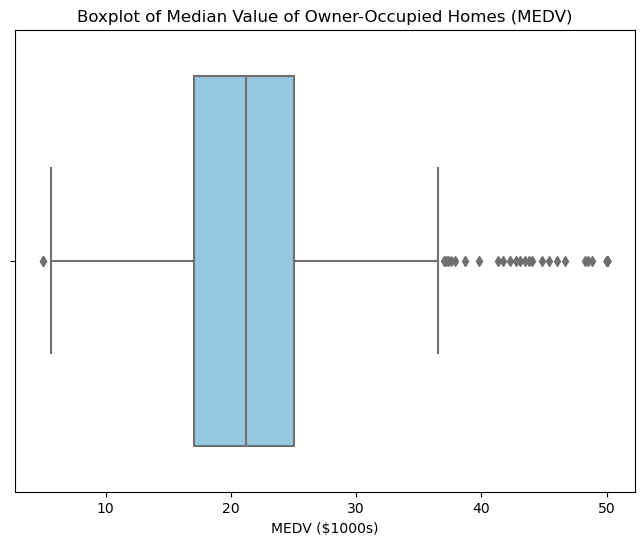

In [12]:
# Boxplot for MEDV (Median value of owner-occupied homes)
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'], color='skyblue')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

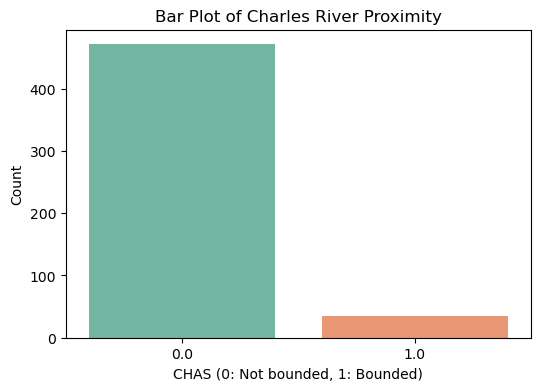

In [13]:
#Bar plot for CHAS (Charles River dummy variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df, palette='Set2')
plt.title('Bar Plot of Charles River Proximity')
plt.xlabel('CHAS (0: Not bounded, 1: Bounded)')
plt.ylabel('Count')
plt.show()

In [16]:
# Discretize AGE into three groups
bins = [0, 35, 70, max(boston_df['AGE'])]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)


<IPython.core.display.Javascript object>

C:\Users\PRASEETHA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

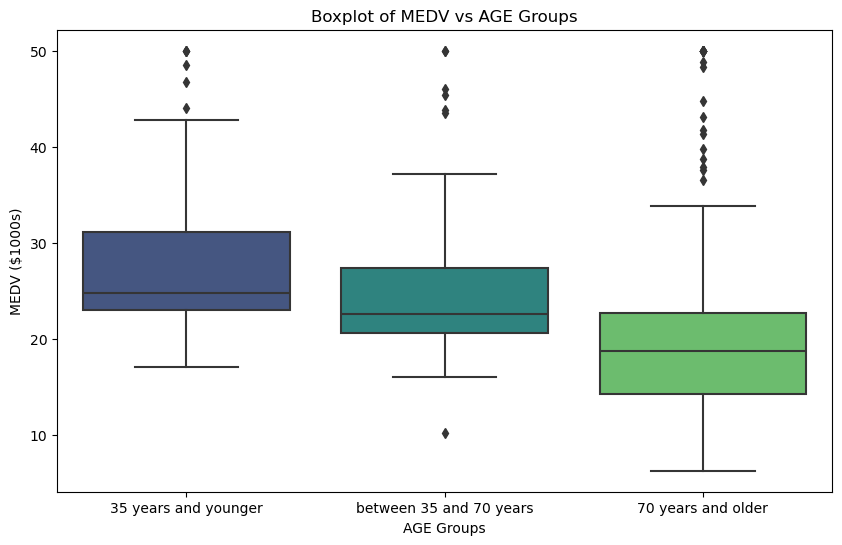

In [17]:
# Boxplot for MEDV vs AGE_Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='viridis')
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('AGE Groups')
plt.ylabel('MEDV ($1000s)')
plt.show()


In [19]:
# Remove the added AGE_Group column for cleanliness in further analysis
boston_df.drop(columns=['AGE_Group'], inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

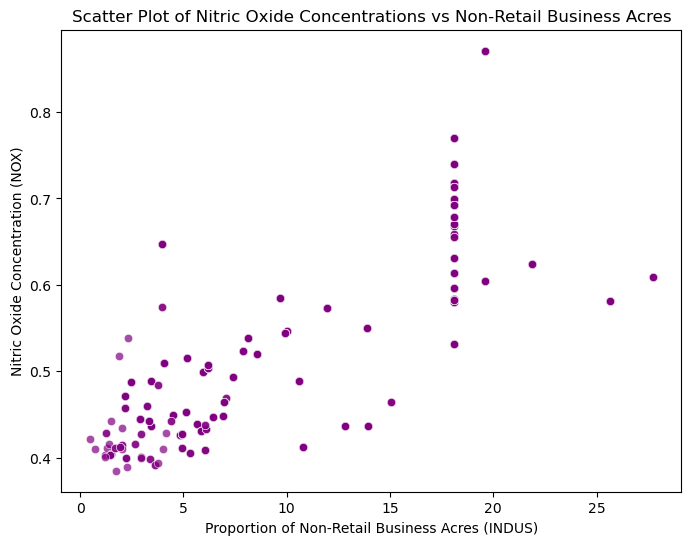

In [20]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.7, color='purple')
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

<IPython.core.display.Javascript object>

C:\Users\PRASEETHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

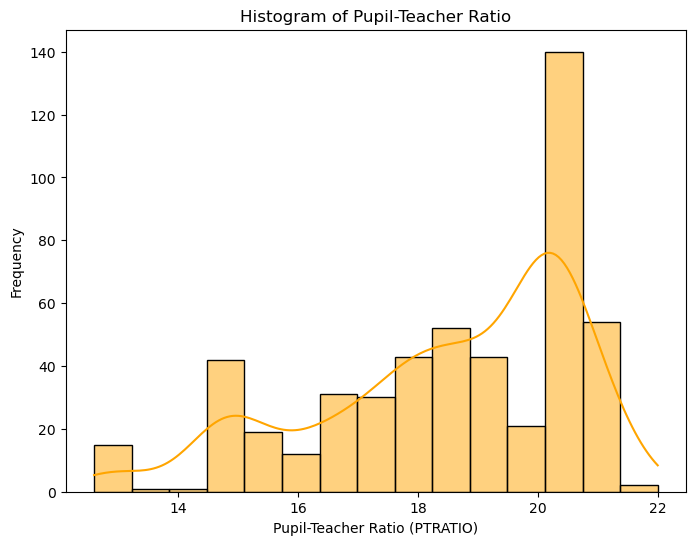

In [21]:
# Histogram for PTRATIO (Pupil-teacher ratio)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='orange')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

Findings: The histogram displays the distribution of pupil-teacher ratios across different towns in Boston. It helps in understanding the variation and central tendency of this educational metric.

Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [22]:
# Separate data for houses bounded and not bounded by Charles river
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [23]:
# Perform t-test
t_statistic, p_value = stats.ttest_ind(bounded, not_bounded)

# Print the results
print("T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

<IPython.core.display.Javascript object>

T-test Results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [24]:
# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0. There is a significant difference in median housing values between houses bounded and not bounded by the Charles river.")
else:
    print("Conclusion: Fail to reject H0. There is no significant difference in median housing values between houses bounded and not bounded by the Charles river.")

Conclusion: Reject H0. There is a significant difference in median housing values between houses bounded and not bounded by the Charles river.


Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [25]:
# Discretize AGE into three groups
bins = [0, 35, 70, max(boston_df['AGE'])]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

In [26]:
# Perform ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# Fit the model
model = ols('MEDV ~ AGE_Group', data=boston_df).fit()

In [28]:
# Perform ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_table)

ANOVA Results:
                 sum_sq     df         F        PR(>F)
AGE_Group   4339.074039    2.0  30.56684  3.435569e-13
Residual   32649.336069  460.0       NaN           NaN


In [29]:
# Conclusion based on p-value from ANOVA table
p_value_anova = anova_table['PR(>F)'][0]
if p_value_anova < alpha:
    print("Conclusion: Reject H0. There is a significant difference in median housing values across different age groups of owner-occupied units built prior to 1940.")
else:
    print("Conclusion: Fail to reject H0. There is no significant difference in median housing values across different age groups of owner-occupied units built prior to 1940.")

# Drop the added AGE_Group column for cleanliness in further analysis
boston_df.drop(columns=['AGE_Group'], inplace=True)

Conclusion: Reject H0. There is a significant difference in median housing values across different age groups of owner-occupied units built prior to 1940.


C:\Users\PRASEETHA\AppData\Local\Temp\ipykernel_19556\759078817.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_anova = anova_table['PR(>F)'][0]


Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [31]:
# Calculate Pearson correlation coefficient
correlation_coefficient, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


<IPython.core.display.Javascript object>

In [32]:
# Print the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value_corr)

Pearson Correlation Coefficient: 0.7636514469209149
P-value: 7.913361061242812e-98


In [35]:
# Conclusion based on p-value
if p_value_corr < alpha:
    print("Conclusion: Reject H0. There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject H0. There is no significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Conclusion: Reject H0. There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.


Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [34]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression

In [37]:
X = boston_df[['DIS']]  # independent variable
y = boston_df['MEDV']    # dependent variable

In [38]:
# Create a linear regression model
model = LinearRegression()

In [39]:
# Fit the model
model.fit(X, y)


LinearRegression()

In [40]:
# Print the coefficients
print("Coefficient (Impact of DIS on MEDV):", model.coef_[0])


Coefficient (Impact of DIS on MEDV): 1.0916130158411093


In [41]:
# Conclusion based on coefficient
if model.coef_[0] != 0:
    print("Conclusion: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("Conclusion: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")

Conclusion: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
